# 8. Neural networks and deep learning

### 8.1 Fashion classification

Dataset:

Full: https://github.com/alexeygrigorev/clothing-dataset

Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

https://cs231n.github.io/

In [1]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


### 8.2 TensorFlow and Keras

Installing TensorFlow

Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow import keras

2022-10-29 18:42:28.469184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow is a library for training deeplearning models and keras is higher level abstraction on the top of tensorflow.
<div>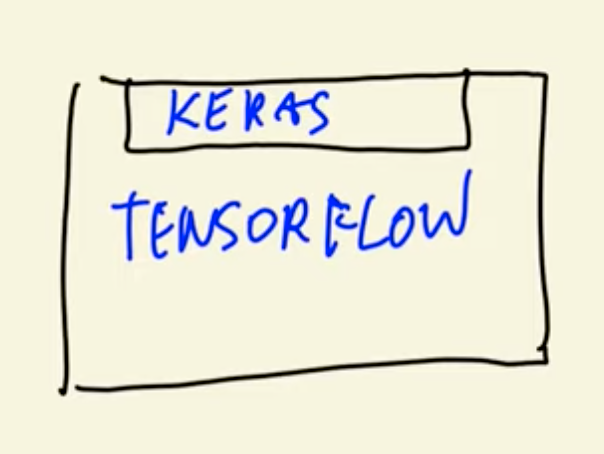</div>


In [6]:
from tensorflow.keras.preprocessing.image import load_img

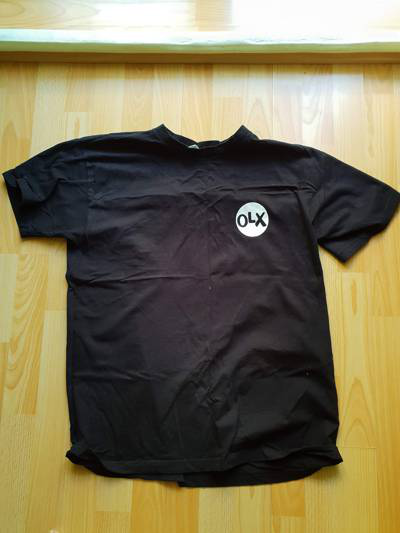

In [7]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [8]:
img = load_img(fullname, target_size=(299, 299))

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

This image is a numpay array with 3 channels (red, green and blue) and for each of the channels we have array. And this array contains array between numbers 0 and 255. It's one bite for wach cell
<div>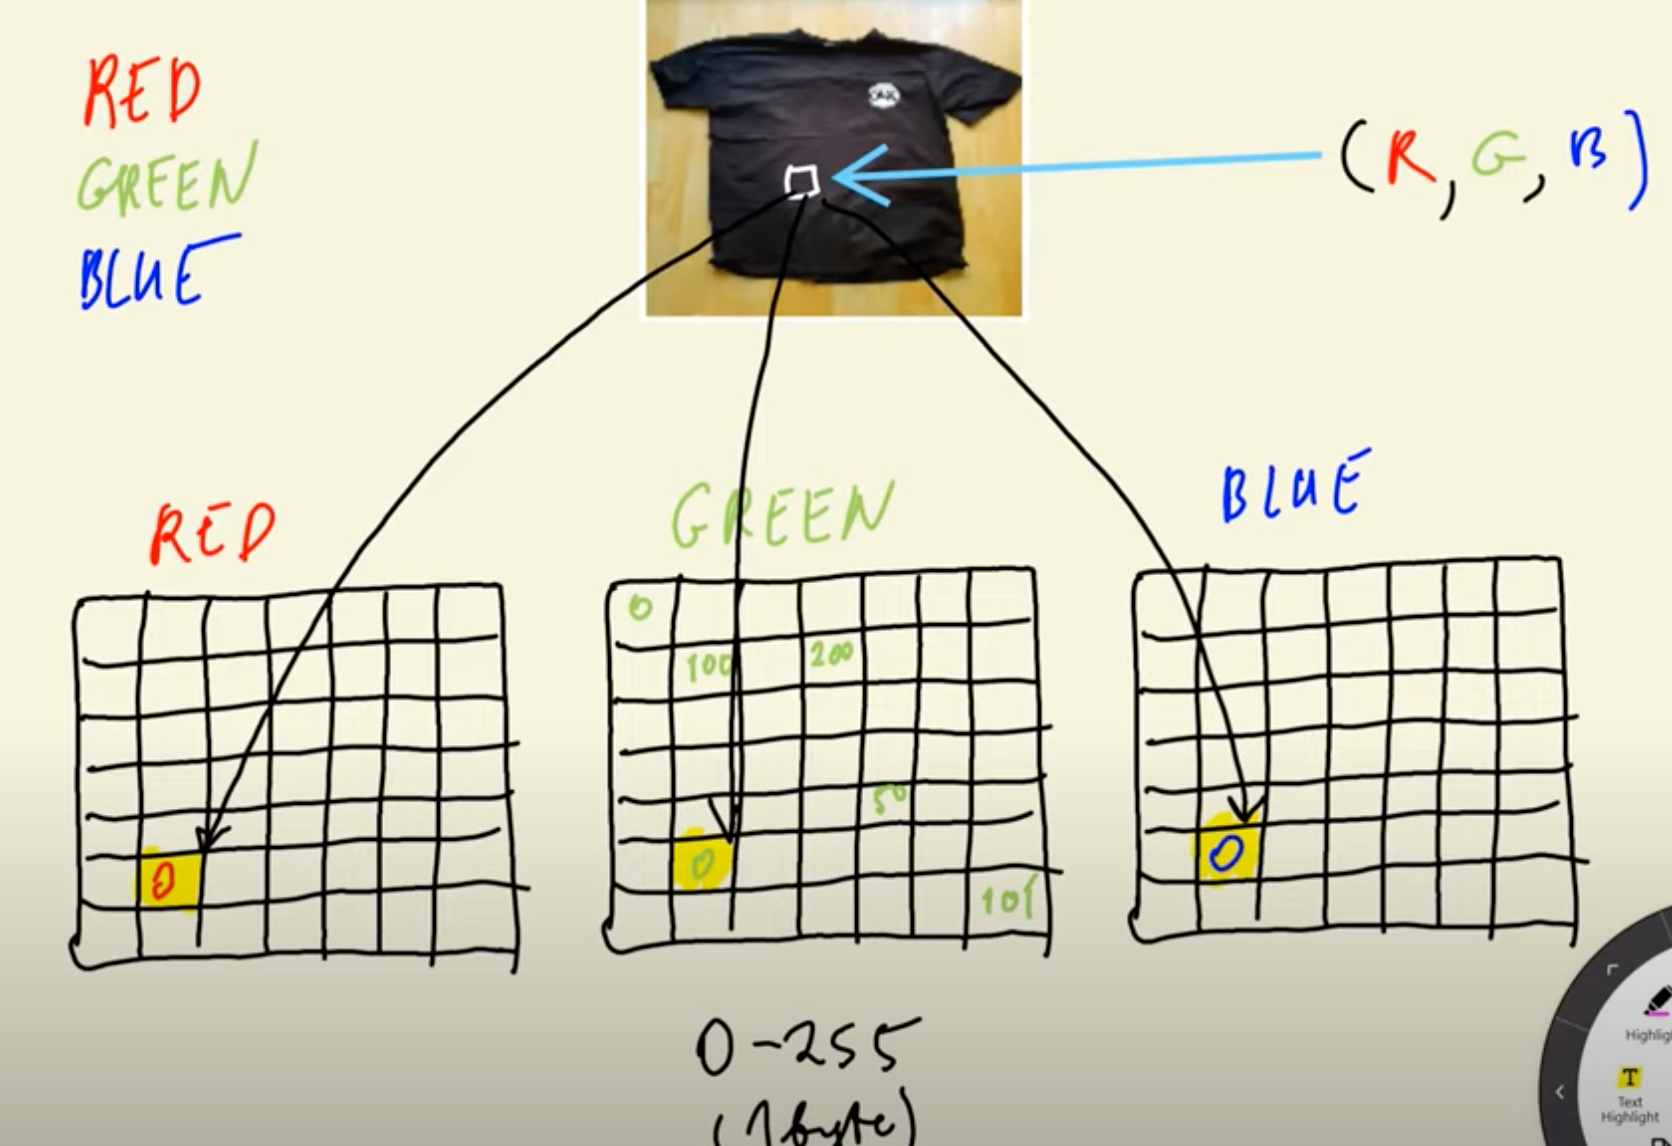</div>

## 8.3 Pre-trained convolutional neural networks

Imagenet dataset: https://www.image-net.org/

Pre-trained models: https://keras.io/api/applications/

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-10-29 20:28:58.370981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


91884032/91884032 [==============================] - 4s 0us/step


In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

1/1 [==============================] - 1s 934ms/step


In [16]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.039600264),
  ('n04370456', 'sweatshirt', 0.035299588),
  ('n03710637', 'maillot', 0.010884134),
  ('n04525038', 'velvet', 0.0018057597)]]

## 8.4 Convolutional neural networks

- Types of layers: convolutional and dense

- Convolutional layers and filters

- Dense layers

There are more layers. Read here: https://cs231n.github.io/

Convolutional neural networks (CNN) uses mostly for images and consist of different types of layers. One of them is convolutional layer. Xception model is convolutional model

<div>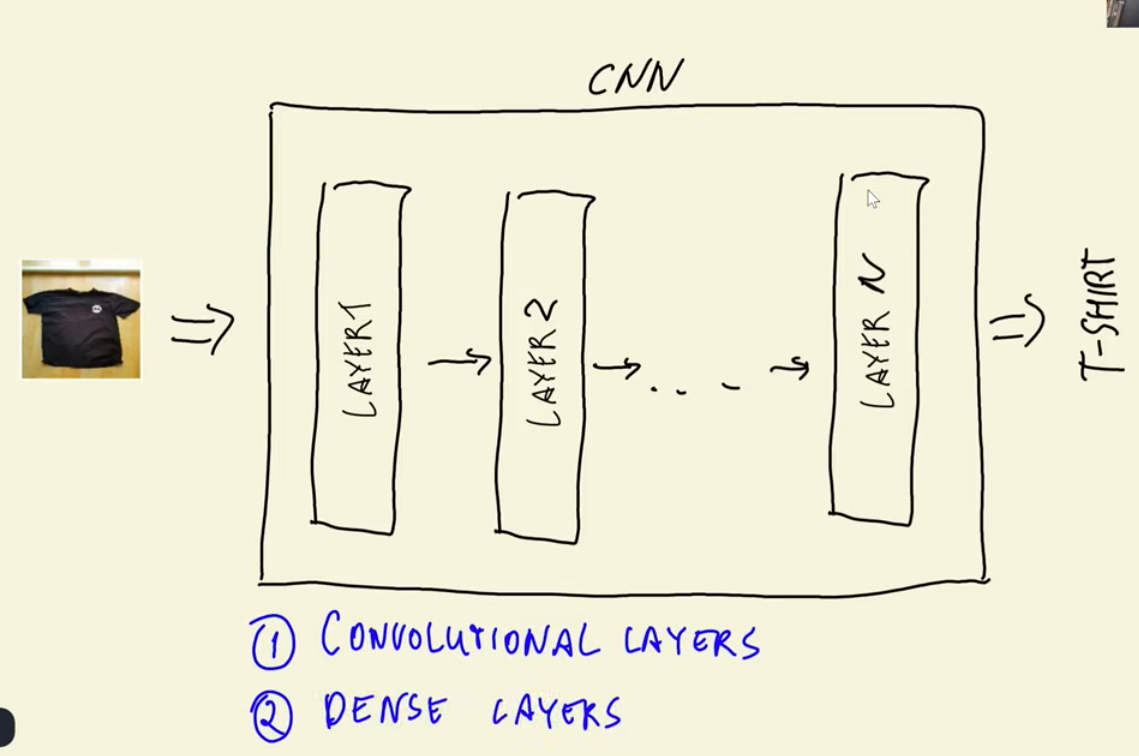</div>

Convolutional layers consist of filters which are like small images (5X5) or smaler. They contain simple shapes ot lines
<dic>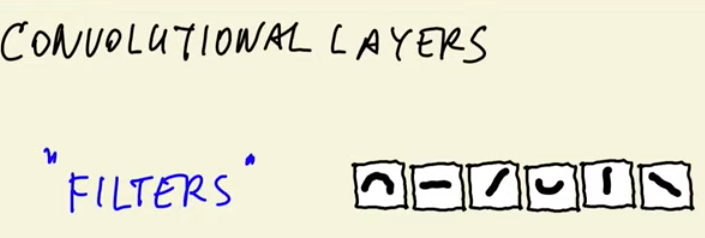</div>

Then we take our image and slide the filter across the image. Avery time we apply the filter to an image we see how similar this filter to the part of image. And the similarity data is filled to the table. 0 - no similarity, and higher number - bigger similarity. Feature map is the result of applying filter to the image
<div>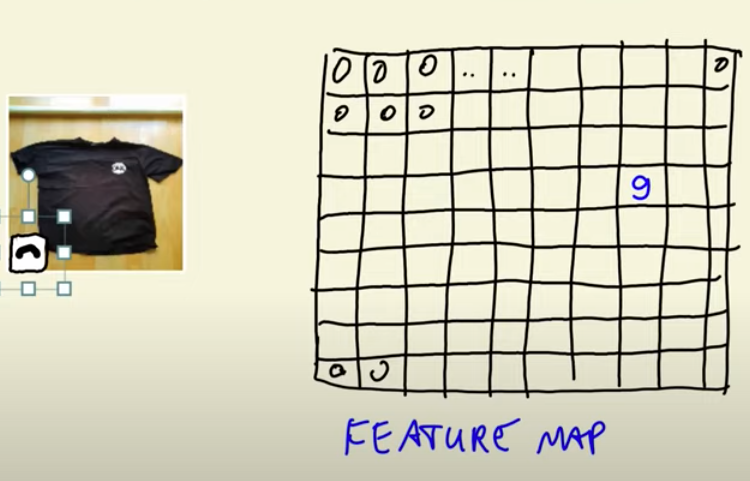</div>
For each filter we get a feature map

<div>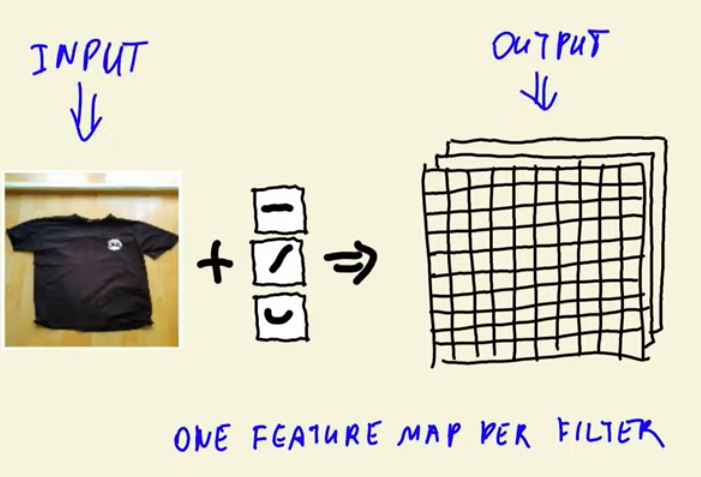</div>

Anothe convolutional layer is created by aplication of its own set of filters applied to the image was produced by first convolutional layer and it producr it's own feature map

<div>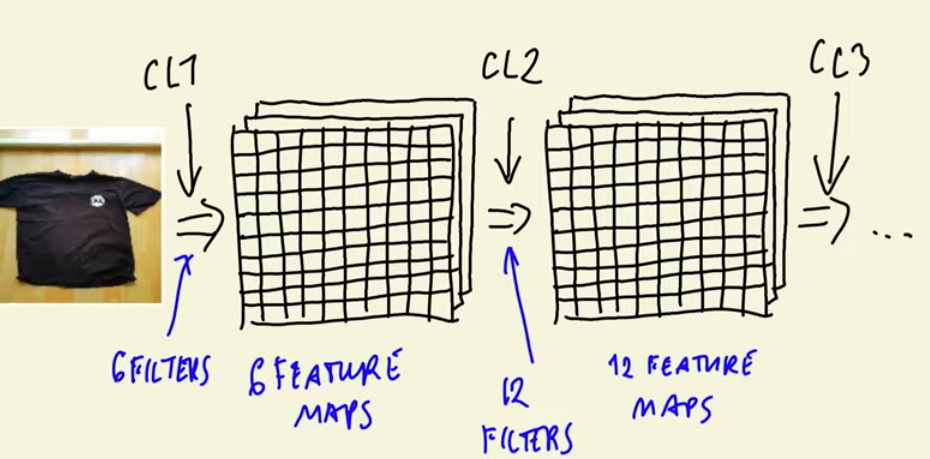</div>

Amount of created feature maps depends on amount of filters were applied to the image. Each convolutional layer can have more complex filters
<><img src="![image.png](attachment:image.png" width="300"></div>